In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# download file from http://www.bast.de/videos/2016_A_S.zip
df = pd.read_csv('2016_A_S.txt', sep=';')

colors = ['#2678B2', '#AFC8E7', '#FD7F28', '#FDBB7D', 
          '#339E34', '#9ADE8D', '#D42A2F', '#FD9898', 
          '#9369BB', '#C5B1D4', '#8B564C', '#C39C95', 
          '#E179C1', '#F6B7D2', '#7F7F7F', '#C7C7C7']

In [2]:
df = df[['Zst', 'Land', 'KFZ_R1', 'KFZ_R2', 'Datum', 'Stunde']]
df.columns = ['nr', 'land', 'kfz_r1', 'kfz_r2', 'date', 'hour']

# convert values in 'date' column to DateTime
df.loc[df.hour == 24, 'hour'] = 0
df['date'] =  pd.to_datetime( df['date'].astype(str) + '-' + df['hour'].astype(str), format='%y%m%d-%H')

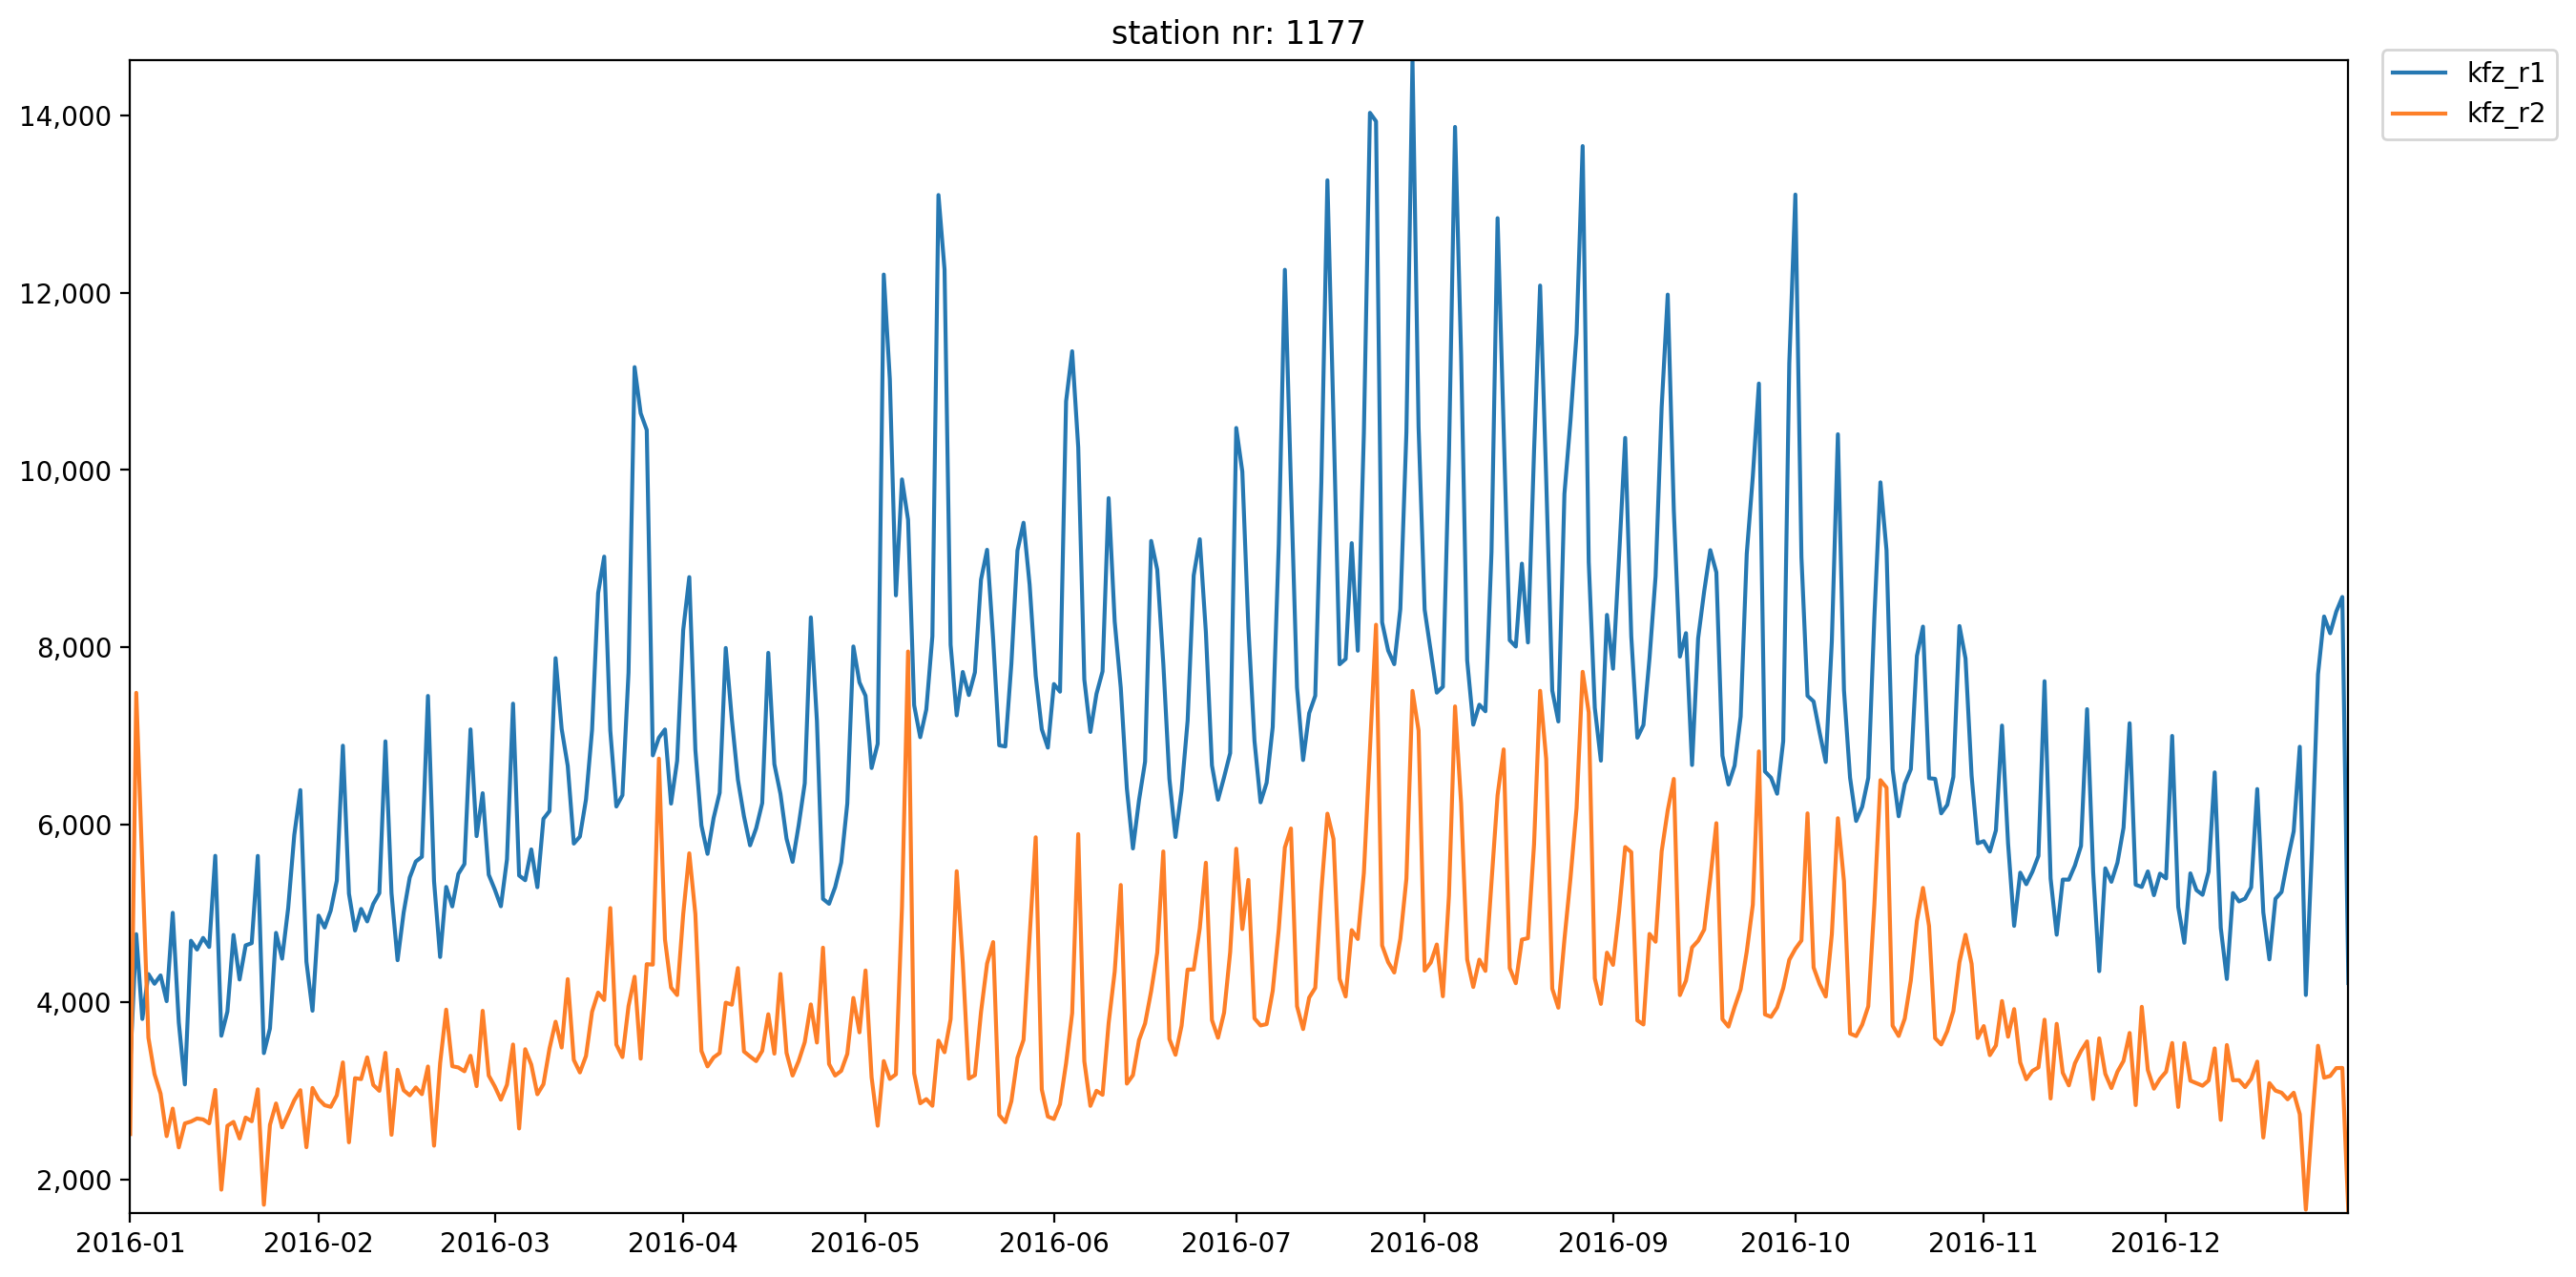

In [3]:
grouped_by_name = df.groupby(['nr'])

number = 1177
station = grouped_by_name.get_group(number)
station_days = station.set_index('date').groupby([pd.TimeGrouper('D')])[['kfz_r1', 'kfz_r2']].sum().reset_index()

fig, ax = plt.subplots(figsize=(15, 8), dpi=200)
ax.plot(station_days['date'], station_days['kfz_r1'], c=colors[0])
ax.plot(station_days['date'], station_days['kfz_r2'], c=colors[2])
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.02))

plt.title('station nr: ' + str(number))
plt.margins(0)
plt.show()

In [4]:
df_scatter = df
df_scatter['sum'] = df_scatter['kfz_r1'] + df_scatter['kfz_r2']
df_byday = df_scatter.set_index('date').groupby(['land', pd.TimeGrouper('D')])[['sum']].sum().reset_index()
df_sorted = df_byday.sort_values(by=['sum'], ascending=False)
df_clean = df_sorted.groupby(['land']).head(3)

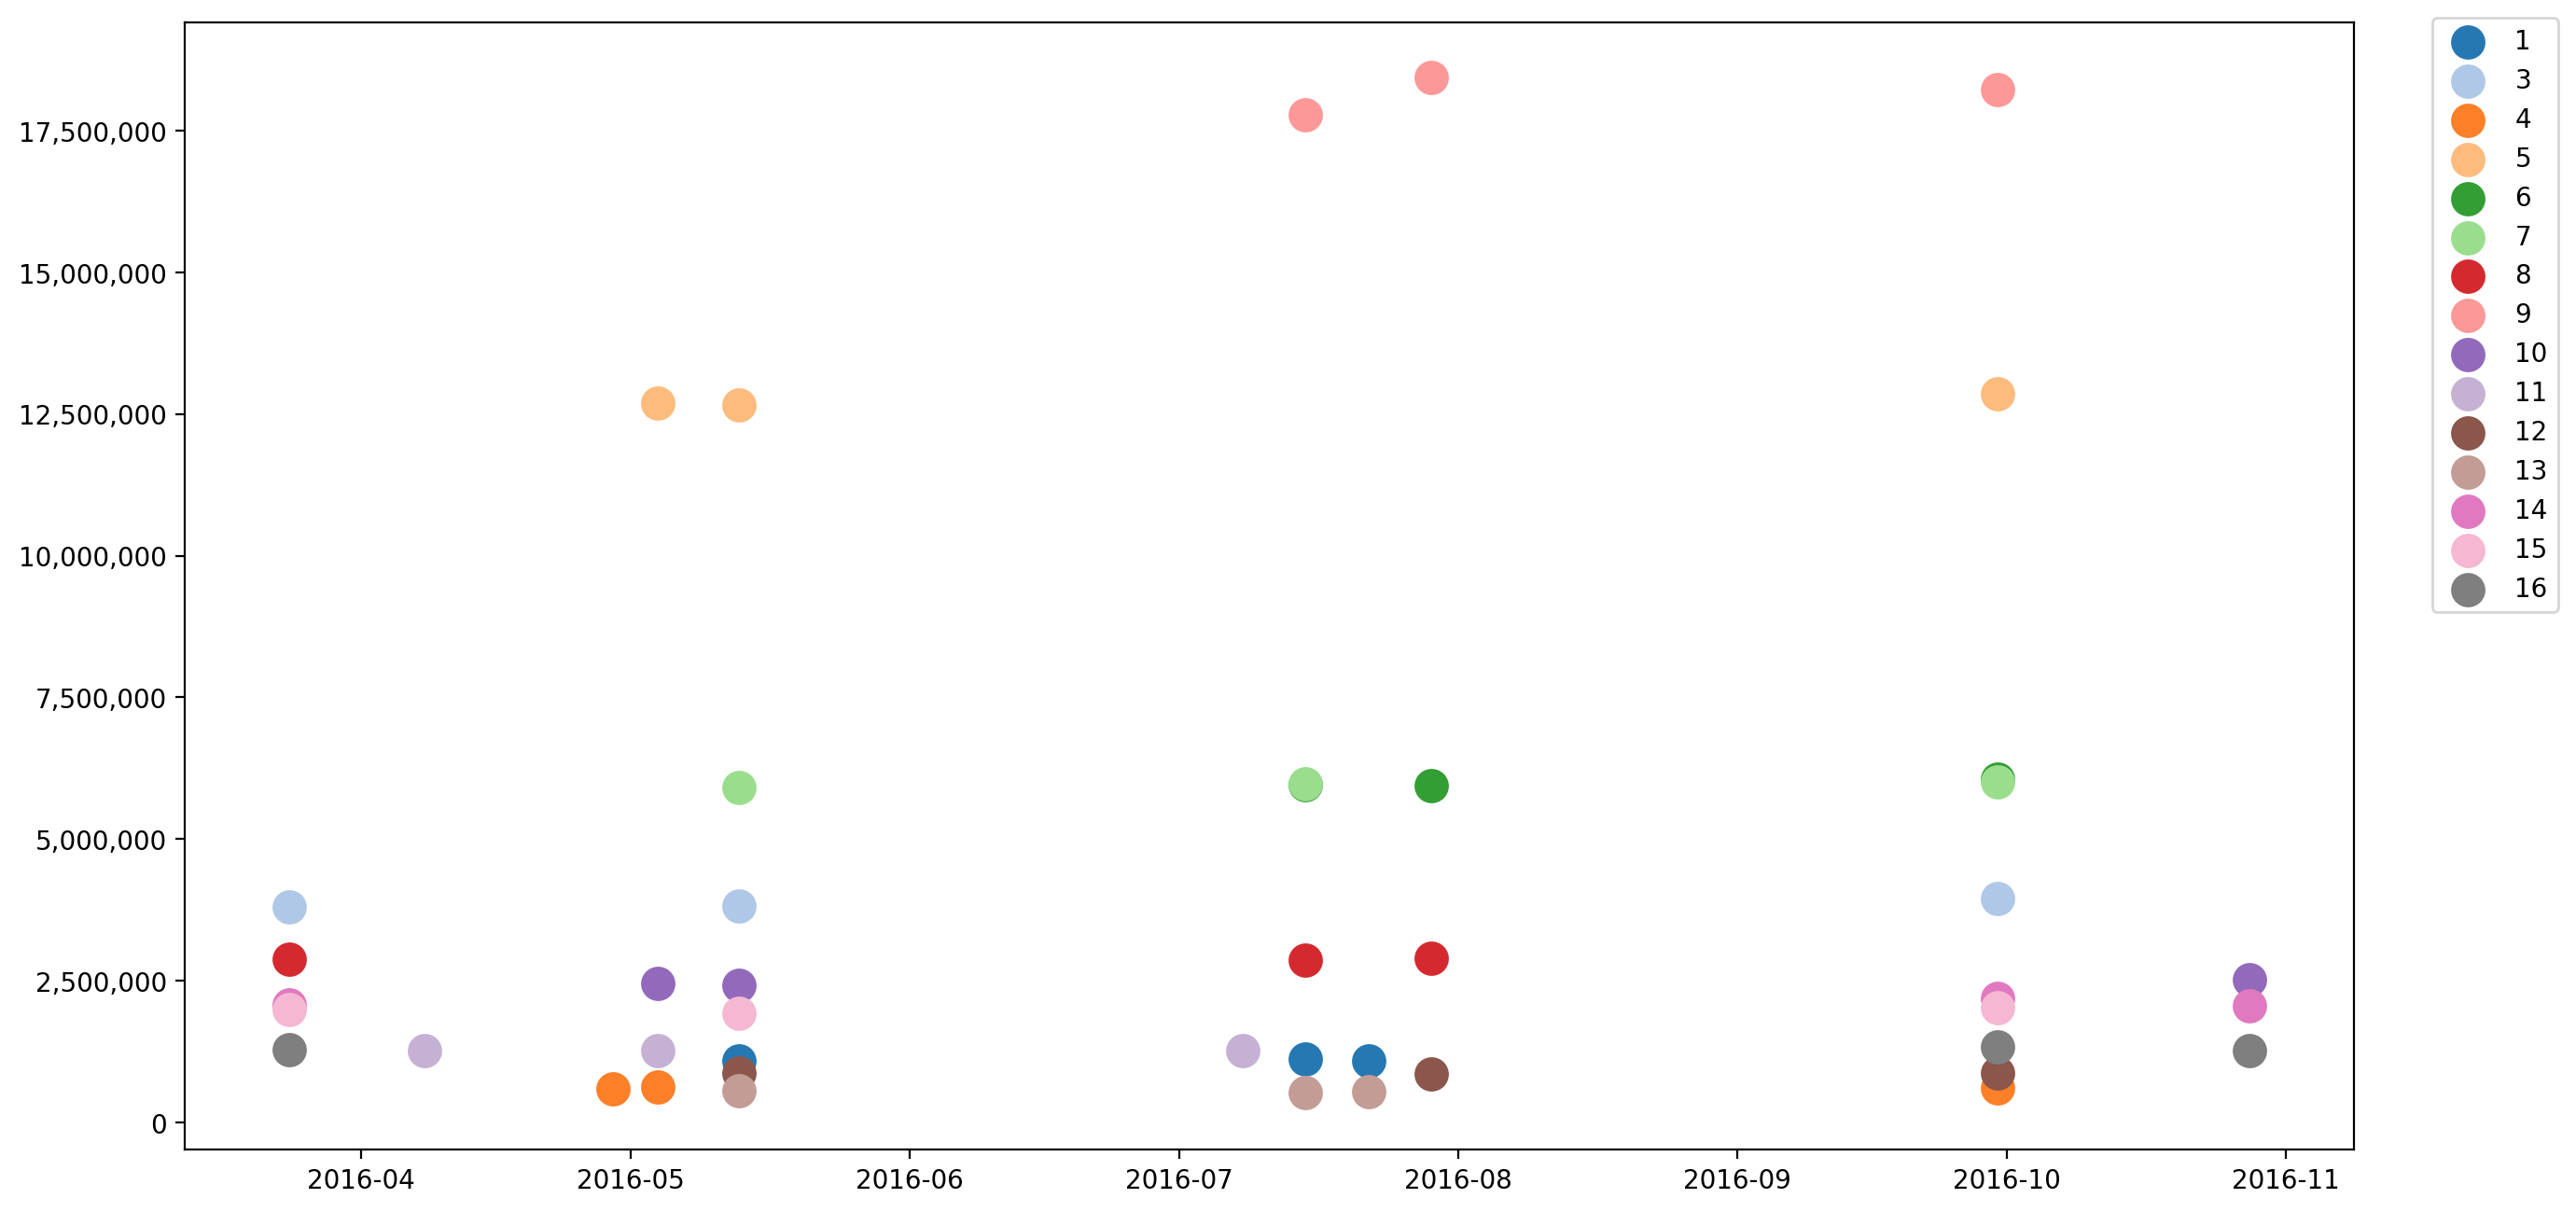

In [5]:
groups = df_clean.groupby('land')
scatter_colors = iter(colors)

fig, ax = plt.subplots(figsize=(15, 8), dpi=200)
for name, group in groups:
    dates = group['date'].dt.strftime('%Y-%m-%d').values
    dates = [pd.to_datetime(d) for d in dates]
    ax.scatter(dates, group['sum'].values, s=150, c=next(scatter_colors), label=name)

ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.015))
plt.show()

In [6]:
df_stacked = pd.read_csv('year_data.csv', sep=';')
df_stacked = df_stacked[df_stacked['str_kl'] != 'A']

grouped_by_land = df_stacked.groupby(['land'])

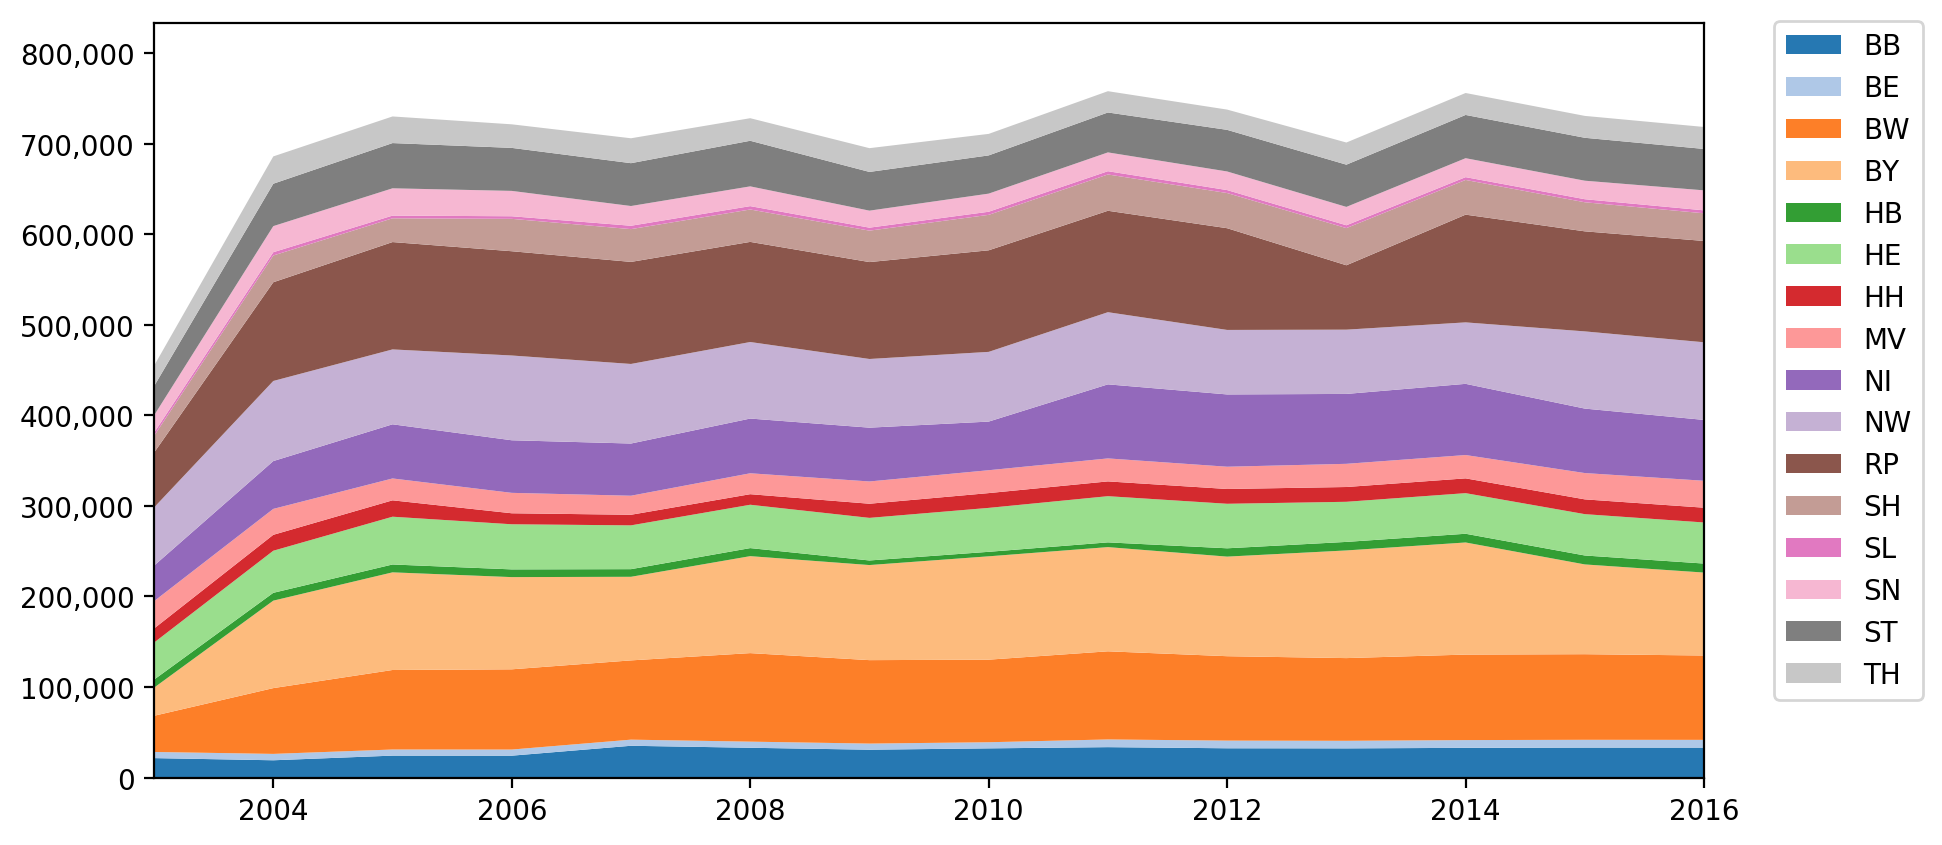

In [7]:
x = [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
names = []
rows = []

for name, land in grouped_by_land:
    by_year = land.groupby(['year'])['sv_r1', 'sv_r2'].sum()
    names.append(name)
    data = (by_year['sv_r1'] + by_year['sv_r2'])
    data = data.fillna(method='pad').values
    rows.append(data)

fig, ax = plt.subplots(figsize=(10, 5), dpi=200)
ax.stackplot(x, rows, labels=names, colors=colors)
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1.02))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
plt.margins(0, 0.1)
plt.show()